In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
plt.style.use('ggplot')

In [23]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
traindata = datasets.FashionMNIST("FashionMNIST/",train=True,download=True,transform=transforms)
trainloader = torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)
testdata = datasets.FashionMNIST("FashionMNIST/",train=False,download=True,transform=transforms)
testloader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

In [85]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(),lr=0.003)

In [26]:
epochs = 1000
error = []
running_loss = 0
for i in range(1,epochs+1):
    
    optimizer.zero_grad()
    
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0],-1)
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i%100==0:
        error.append(loss.item())
        if i%1000==0:
            print("After {} episode, Loss: {}".format(i,loss.item()))
            print("===============================================")

After 1000 episode, Loss: 0.47717228531837463


In [27]:
error = np.array(error)
num_episodes = np.linspace(0,epochs,len(error))

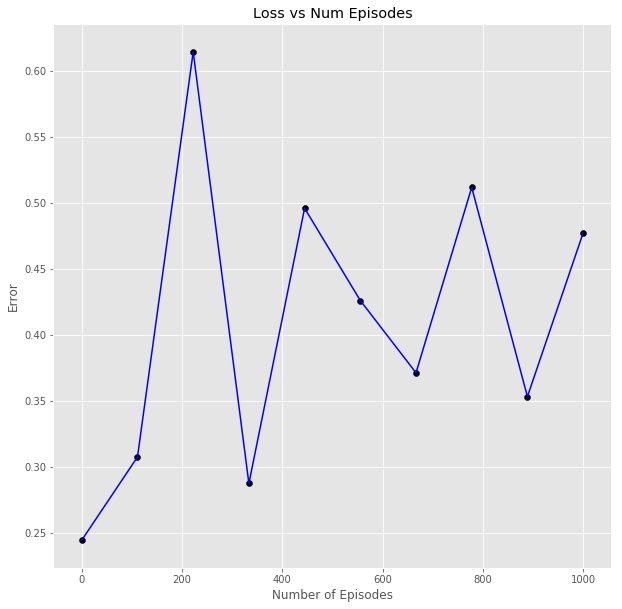

In [28]:
plt.figure(figsize=(10,10))
plt.title("Loss vs Num Episodes")
plt.plot(num_episodes,error,c='b')
plt.scatter(num_episodes,error,c='k')
plt.xlabel("Number of Episodes")
plt.ylabel("Error")
plt.show()

In [29]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

In [30]:
predsprobs = model(images)
preds = torch.argmax(predsprobs,dim=1)
preds = preds.numpy()

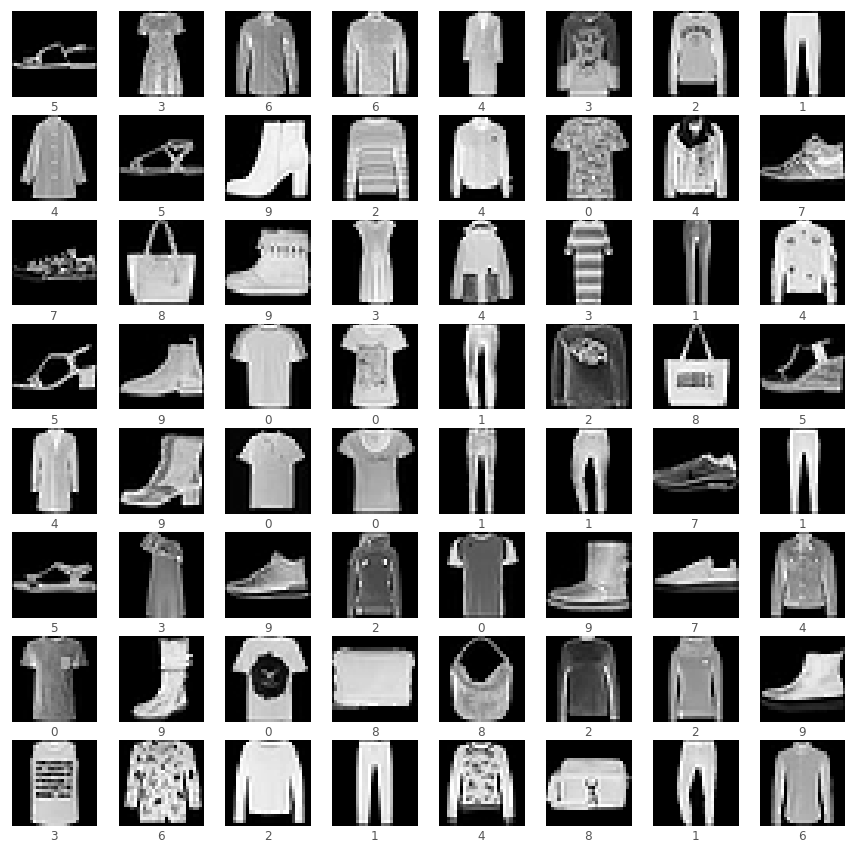

In [31]:
figure = plt.figure(figsize=(15,15))
for i in range(images.shape[0]):
    plt.subplot(8,8,i+1)
    plt.imshow(images[i].reshape(28,28),cmap='gray',interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(preds[i])
plt.show()

In [48]:
images, labels = next(iter(testloader))
images = images.view(images.shape[0],-1)
ps = torch.exp(model(images))
ps.shape

torch.Size([64, 10])

In [49]:
top_p, top_class = ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[1],
        [2],
        [4],
        [8],
        [4],
        [3],
        [9],
        [5],
        [7],
        [7]])


In [50]:
equals = top_class==labels.view(*top_class.shape)

In [51]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy: {accuracy.item()*100}%")

Accuracy: 85.9375%


In [91]:
epochs = 1000
running_loss = 0
train_losses, test_losses = [], []
for i in range(1,epochs+1):
    
    optimizer.zero_grad()
    
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0],-1)
    
    output = model(images)
    train_loss = criterion(output, labels)
    train_loss.backward()
    optimizer.step()
    
    running_loss += train_loss.item()
#     if i%100==0:
#         error.append(loss.item())
#         if i%1000==0:
#             print("After {} episode, Loss: {}".format(i,loss.item()))
#             print("===============================================")
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        model.eval()
        images, labels = next(iter(testloader))
        images = images.reshape(images.shape[0],-1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1,dim=1)
        equals = top_class==labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        #print(f"Accuracy: {accuracy.item()*100}%")
    model.train()
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print("Epoch {}/{}.. ".format(i,epochs),
         "Training Loss: {:.3f}.. ".format(train_loss),
         "Test Loss: {:.3f}.. ".format(test_loss),
         "Test Accuracy: {:.3f}".format(accuracy*100))

Epoch 1/1000..  Training Loss: 0.286..  Test Loss: 0.481..  Test Accuracy: 87.500
Epoch 2/1000..  Training Loss: 0.328..  Test Loss: 0.478..  Test Accuracy: 81.250
Epoch 3/1000..  Training Loss: 0.443..  Test Loss: 0.587..  Test Accuracy: 76.562
Epoch 4/1000..  Training Loss: 0.619..  Test Loss: 0.399..  Test Accuracy: 85.938
Epoch 5/1000..  Training Loss: 0.697..  Test Loss: 0.377..  Test Accuracy: 84.375
Epoch 6/1000..  Training Loss: 0.851..  Test Loss: 0.552..  Test Accuracy: 81.250
Epoch 7/1000..  Training Loss: 0.431..  Test Loss: 0.205..  Test Accuracy: 93.750
Epoch 8/1000..  Training Loss: 0.400..  Test Loss: 0.352..  Test Accuracy: 84.375
Epoch 9/1000..  Training Loss: 0.343..  Test Loss: 0.254..  Test Accuracy: 92.188
Epoch 10/1000..  Training Loss: 0.575..  Test Loss: 0.459..  Test Accuracy: 84.375
Epoch 11/1000..  Training Loss: 0.464..  Test Loss: 0.783..  Test Accuracy: 73.438
Epoch 12/1000..  Training Loss: 0.388..  Test Loss: 0.404..  Test Accuracy: 84.375
Epoch 13/1000

Epoch 100/1000..  Training Loss: 0.504..  Test Loss: 0.267..  Test Accuracy: 89.062
Epoch 101/1000..  Training Loss: 0.802..  Test Loss: 0.412..  Test Accuracy: 84.375
Epoch 102/1000..  Training Loss: 0.384..  Test Loss: 0.639..  Test Accuracy: 84.375
Epoch 103/1000..  Training Loss: 0.439..  Test Loss: 0.395..  Test Accuracy: 82.812
Epoch 104/1000..  Training Loss: 0.564..  Test Loss: 0.500..  Test Accuracy: 82.812
Epoch 105/1000..  Training Loss: 0.747..  Test Loss: 0.354..  Test Accuracy: 81.250
Epoch 106/1000..  Training Loss: 0.575..  Test Loss: 0.391..  Test Accuracy: 85.938
Epoch 107/1000..  Training Loss: 0.545..  Test Loss: 0.428..  Test Accuracy: 78.125
Epoch 108/1000..  Training Loss: 0.544..  Test Loss: 0.470..  Test Accuracy: 84.375
Epoch 109/1000..  Training Loss: 0.349..  Test Loss: 0.537..  Test Accuracy: 81.250
Epoch 110/1000..  Training Loss: 0.489..  Test Loss: 0.278..  Test Accuracy: 87.500
Epoch 111/1000..  Training Loss: 0.426..  Test Loss: 0.419..  Test Accuracy:

Epoch 200/1000..  Training Loss: 0.846..  Test Loss: 0.585..  Test Accuracy: 76.562
Epoch 201/1000..  Training Loss: 0.405..  Test Loss: 0.334..  Test Accuracy: 85.938
Epoch 202/1000..  Training Loss: 0.369..  Test Loss: 0.521..  Test Accuracy: 84.375
Epoch 203/1000..  Training Loss: 0.420..  Test Loss: 0.426..  Test Accuracy: 84.375
Epoch 204/1000..  Training Loss: 0.208..  Test Loss: 0.367..  Test Accuracy: 85.938
Epoch 205/1000..  Training Loss: 0.482..  Test Loss: 0.391..  Test Accuracy: 90.625
Epoch 206/1000..  Training Loss: 0.711..  Test Loss: 0.403..  Test Accuracy: 81.250
Epoch 207/1000..  Training Loss: 0.429..  Test Loss: 0.384..  Test Accuracy: 87.500
Epoch 208/1000..  Training Loss: 0.414..  Test Loss: 0.570..  Test Accuracy: 82.812
Epoch 209/1000..  Training Loss: 0.494..  Test Loss: 0.549..  Test Accuracy: 76.562
Epoch 210/1000..  Training Loss: 0.411..  Test Loss: 0.326..  Test Accuracy: 84.375
Epoch 211/1000..  Training Loss: 0.390..  Test Loss: 0.286..  Test Accuracy:

Epoch 299/1000..  Training Loss: 0.393..  Test Loss: 0.404..  Test Accuracy: 87.500
Epoch 300/1000..  Training Loss: 0.491..  Test Loss: 0.405..  Test Accuracy: 90.625
Epoch 301/1000..  Training Loss: 0.538..  Test Loss: 0.539..  Test Accuracy: 75.000
Epoch 302/1000..  Training Loss: 0.422..  Test Loss: 0.362..  Test Accuracy: 89.062
Epoch 303/1000..  Training Loss: 0.331..  Test Loss: 0.399..  Test Accuracy: 79.688
Epoch 304/1000..  Training Loss: 0.570..  Test Loss: 0.319..  Test Accuracy: 87.500
Epoch 305/1000..  Training Loss: 0.575..  Test Loss: 0.432..  Test Accuracy: 82.812
Epoch 306/1000..  Training Loss: 0.399..  Test Loss: 0.269..  Test Accuracy: 89.062
Epoch 307/1000..  Training Loss: 0.281..  Test Loss: 0.496..  Test Accuracy: 81.250
Epoch 308/1000..  Training Loss: 0.736..  Test Loss: 0.410..  Test Accuracy: 84.375
Epoch 309/1000..  Training Loss: 0.532..  Test Loss: 0.295..  Test Accuracy: 87.500
Epoch 310/1000..  Training Loss: 0.466..  Test Loss: 0.402..  Test Accuracy:

Epoch 398/1000..  Training Loss: 0.290..  Test Loss: 0.541..  Test Accuracy: 79.688
Epoch 399/1000..  Training Loss: 0.514..  Test Loss: 0.332..  Test Accuracy: 84.375
Epoch 400/1000..  Training Loss: 0.638..  Test Loss: 0.445..  Test Accuracy: 84.375
Epoch 401/1000..  Training Loss: 0.518..  Test Loss: 0.553..  Test Accuracy: 79.688
Epoch 402/1000..  Training Loss: 0.315..  Test Loss: 0.465..  Test Accuracy: 75.000
Epoch 403/1000..  Training Loss: 0.596..  Test Loss: 0.228..  Test Accuracy: 90.625
Epoch 404/1000..  Training Loss: 0.537..  Test Loss: 0.417..  Test Accuracy: 82.812
Epoch 405/1000..  Training Loss: 0.252..  Test Loss: 0.414..  Test Accuracy: 82.812
Epoch 406/1000..  Training Loss: 0.451..  Test Loss: 0.360..  Test Accuracy: 89.062
Epoch 407/1000..  Training Loss: 0.442..  Test Loss: 0.474..  Test Accuracy: 75.000
Epoch 408/1000..  Training Loss: 0.494..  Test Loss: 0.401..  Test Accuracy: 89.062
Epoch 409/1000..  Training Loss: 0.498..  Test Loss: 0.185..  Test Accuracy:

Epoch 499/1000..  Training Loss: 0.494..  Test Loss: 0.403..  Test Accuracy: 82.812
Epoch 500/1000..  Training Loss: 0.479..  Test Loss: 0.214..  Test Accuracy: 96.875
Epoch 501/1000..  Training Loss: 0.497..  Test Loss: 0.395..  Test Accuracy: 87.500
Epoch 502/1000..  Training Loss: 0.396..  Test Loss: 0.873..  Test Accuracy: 70.312
Epoch 503/1000..  Training Loss: 0.515..  Test Loss: 0.536..  Test Accuracy: 84.375
Epoch 504/1000..  Training Loss: 0.779..  Test Loss: 0.516..  Test Accuracy: 78.125
Epoch 505/1000..  Training Loss: 0.601..  Test Loss: 0.481..  Test Accuracy: 84.375
Epoch 506/1000..  Training Loss: 0.395..  Test Loss: 0.631..  Test Accuracy: 78.125
Epoch 507/1000..  Training Loss: 0.570..  Test Loss: 0.577..  Test Accuracy: 76.562
Epoch 508/1000..  Training Loss: 0.360..  Test Loss: 0.455..  Test Accuracy: 81.250
Epoch 509/1000..  Training Loss: 0.628..  Test Loss: 0.404..  Test Accuracy: 90.625
Epoch 510/1000..  Training Loss: 0.476..  Test Loss: 0.560..  Test Accuracy:

Epoch 599/1000..  Training Loss: 0.403..  Test Loss: 0.352..  Test Accuracy: 84.375
Epoch 600/1000..  Training Loss: 0.261..  Test Loss: 0.438..  Test Accuracy: 82.812
Epoch 601/1000..  Training Loss: 0.307..  Test Loss: 0.458..  Test Accuracy: 85.938
Epoch 602/1000..  Training Loss: 0.447..  Test Loss: 0.486..  Test Accuracy: 82.812
Epoch 603/1000..  Training Loss: 0.571..  Test Loss: 0.444..  Test Accuracy: 84.375
Epoch 604/1000..  Training Loss: 0.453..  Test Loss: 0.539..  Test Accuracy: 81.250
Epoch 605/1000..  Training Loss: 0.624..  Test Loss: 0.650..  Test Accuracy: 76.562
Epoch 606/1000..  Training Loss: 0.830..  Test Loss: 0.473..  Test Accuracy: 82.812
Epoch 607/1000..  Training Loss: 0.590..  Test Loss: 0.543..  Test Accuracy: 73.438
Epoch 608/1000..  Training Loss: 0.627..  Test Loss: 0.290..  Test Accuracy: 85.938
Epoch 609/1000..  Training Loss: 0.353..  Test Loss: 0.386..  Test Accuracy: 85.938
Epoch 610/1000..  Training Loss: 0.391..  Test Loss: 0.375..  Test Accuracy:

Epoch 697/1000..  Training Loss: 0.457..  Test Loss: 0.461..  Test Accuracy: 85.938
Epoch 698/1000..  Training Loss: 0.405..  Test Loss: 0.482..  Test Accuracy: 84.375
Epoch 699/1000..  Training Loss: 0.245..  Test Loss: 0.632..  Test Accuracy: 78.125
Epoch 700/1000..  Training Loss: 0.592..  Test Loss: 0.420..  Test Accuracy: 85.938
Epoch 701/1000..  Training Loss: 0.370..  Test Loss: 0.187..  Test Accuracy: 90.625
Epoch 702/1000..  Training Loss: 0.605..  Test Loss: 0.471..  Test Accuracy: 81.250
Epoch 703/1000..  Training Loss: 0.440..  Test Loss: 0.711..  Test Accuracy: 85.938
Epoch 704/1000..  Training Loss: 0.384..  Test Loss: 0.451..  Test Accuracy: 85.938
Epoch 705/1000..  Training Loss: 0.637..  Test Loss: 0.362..  Test Accuracy: 81.250
Epoch 706/1000..  Training Loss: 0.325..  Test Loss: 0.615..  Test Accuracy: 78.125
Epoch 707/1000..  Training Loss: 0.464..  Test Loss: 0.540..  Test Accuracy: 78.125
Epoch 708/1000..  Training Loss: 0.317..  Test Loss: 0.282..  Test Accuracy:

Epoch 798/1000..  Training Loss: 0.515..  Test Loss: 0.298..  Test Accuracy: 90.625
Epoch 799/1000..  Training Loss: 0.327..  Test Loss: 0.239..  Test Accuracy: 89.062
Epoch 800/1000..  Training Loss: 0.328..  Test Loss: 0.590..  Test Accuracy: 82.812
Epoch 801/1000..  Training Loss: 0.523..  Test Loss: 0.456..  Test Accuracy: 85.938
Epoch 802/1000..  Training Loss: 0.499..  Test Loss: 0.317..  Test Accuracy: 87.500
Epoch 803/1000..  Training Loss: 0.647..  Test Loss: 0.428..  Test Accuracy: 87.500
Epoch 804/1000..  Training Loss: 0.382..  Test Loss: 0.373..  Test Accuracy: 82.812
Epoch 805/1000..  Training Loss: 0.287..  Test Loss: 0.362..  Test Accuracy: 87.500
Epoch 806/1000..  Training Loss: 0.479..  Test Loss: 0.466..  Test Accuracy: 84.375
Epoch 807/1000..  Training Loss: 0.485..  Test Loss: 0.466..  Test Accuracy: 82.812
Epoch 808/1000..  Training Loss: 0.428..  Test Loss: 0.399..  Test Accuracy: 85.938
Epoch 809/1000..  Training Loss: 0.559..  Test Loss: 0.278..  Test Accuracy:

Epoch 896/1000..  Training Loss: 0.550..  Test Loss: 0.501..  Test Accuracy: 85.938
Epoch 897/1000..  Training Loss: 0.304..  Test Loss: 0.387..  Test Accuracy: 89.062
Epoch 898/1000..  Training Loss: 0.335..  Test Loss: 0.294..  Test Accuracy: 92.188
Epoch 899/1000..  Training Loss: 0.369..  Test Loss: 0.351..  Test Accuracy: 90.625
Epoch 900/1000..  Training Loss: 0.208..  Test Loss: 0.403..  Test Accuracy: 85.938
Epoch 901/1000..  Training Loss: 0.350..  Test Loss: 0.305..  Test Accuracy: 87.500
Epoch 902/1000..  Training Loss: 0.313..  Test Loss: 0.514..  Test Accuracy: 79.688
Epoch 903/1000..  Training Loss: 0.391..  Test Loss: 0.372..  Test Accuracy: 85.938
Epoch 904/1000..  Training Loss: 0.535..  Test Loss: 0.521..  Test Accuracy: 84.375
Epoch 905/1000..  Training Loss: 0.411..  Test Loss: 0.562..  Test Accuracy: 84.375
Epoch 906/1000..  Training Loss: 0.464..  Test Loss: 0.450..  Test Accuracy: 81.250
Epoch 907/1000..  Training Loss: 0.528..  Test Loss: 0.490..  Test Accuracy:

Epoch 995/1000..  Training Loss: 0.352..  Test Loss: 0.410..  Test Accuracy: 84.375
Epoch 996/1000..  Training Loss: 0.366..  Test Loss: 0.414..  Test Accuracy: 89.062
Epoch 997/1000..  Training Loss: 0.400..  Test Loss: 0.523..  Test Accuracy: 82.812
Epoch 998/1000..  Training Loss: 0.457..  Test Loss: 0.451..  Test Accuracy: 85.938
Epoch 999/1000..  Training Loss: 0.272..  Test Loss: 0.525..  Test Accuracy: 73.438
Epoch 1000/1000..  Training Loss: 0.394..  Test Loss: 0.483..  Test Accuracy: 82.812


In [92]:
%config InlineBackend.figure_format = 'retina'

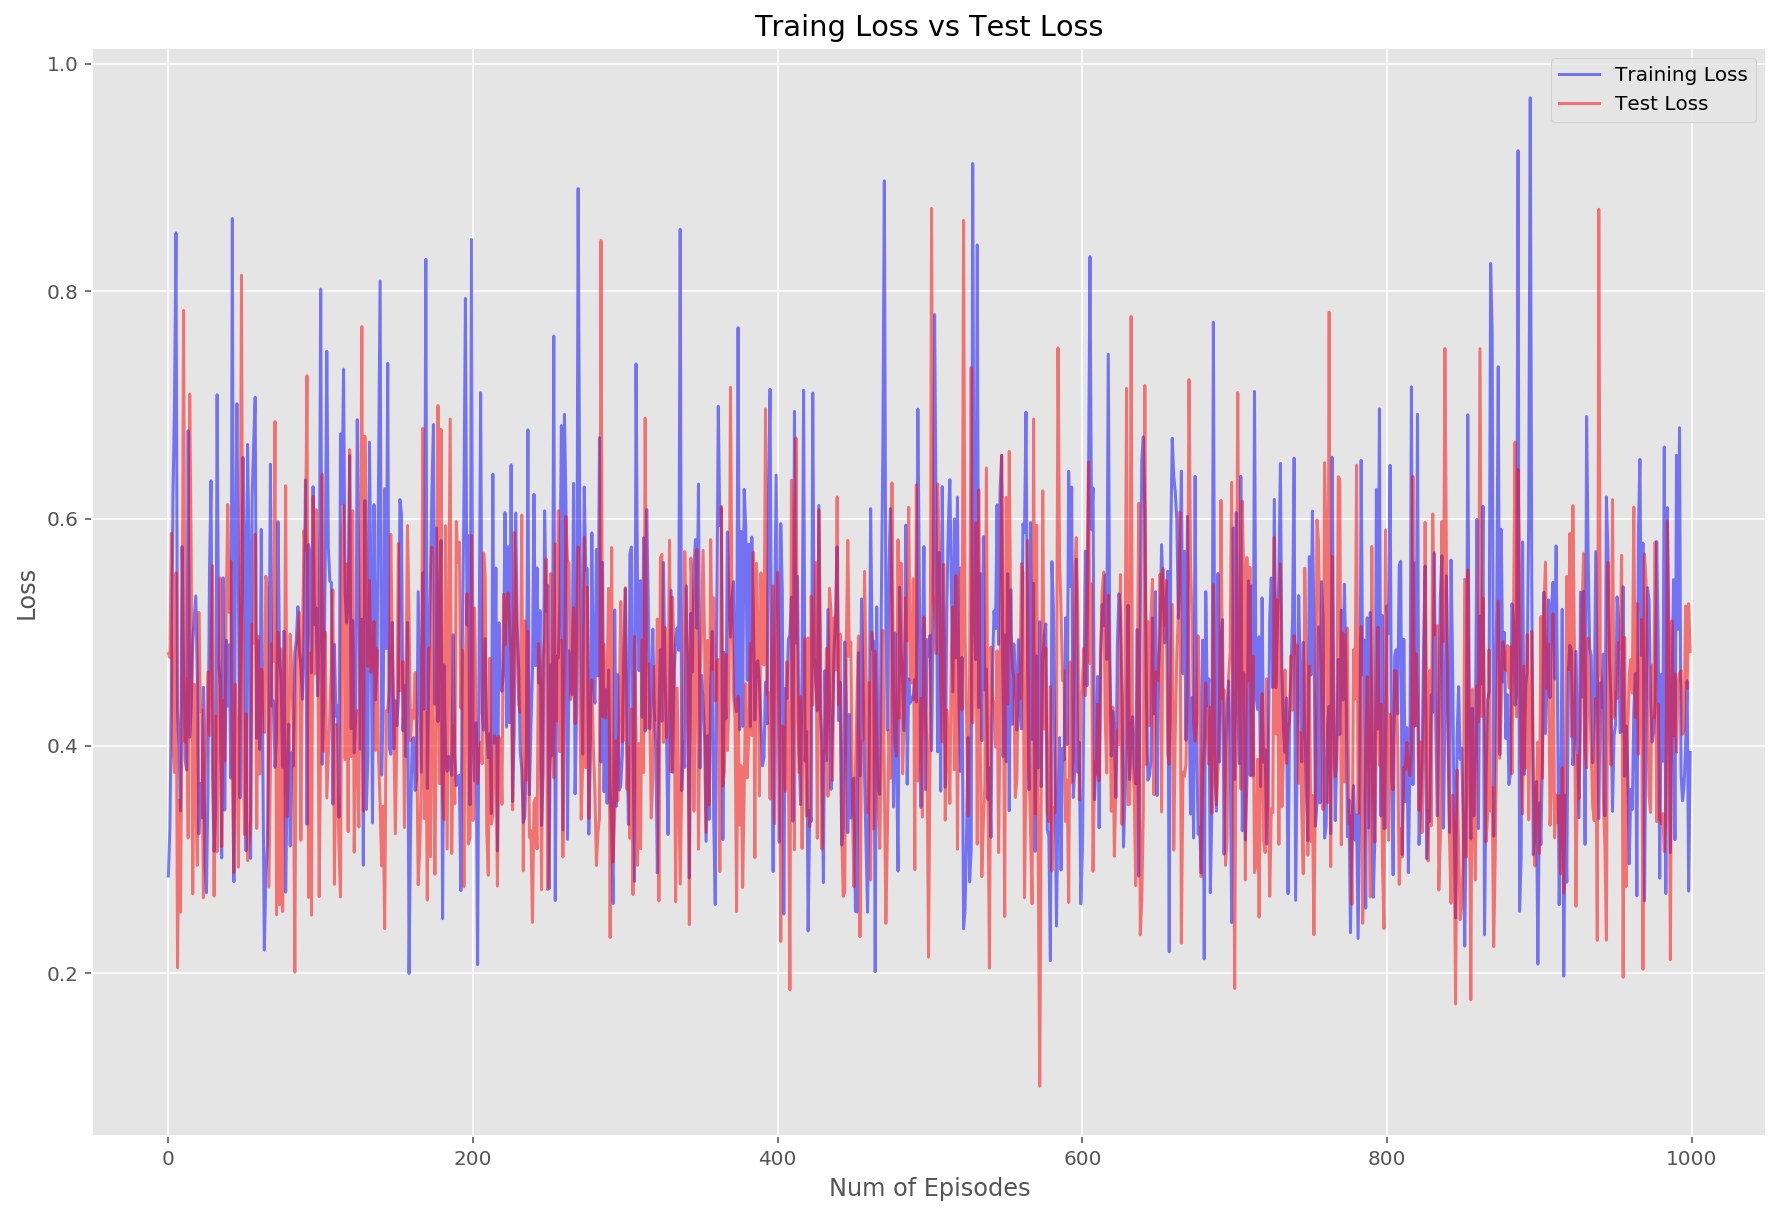

In [94]:
plt.figure(figsize=(15,10))
plt.plot(train_losses,label='Training Loss',c='b',alpha=.50)
plt.plot(test_losses,label='Test Loss',c='r',alpha=.50)
plt.title("Traing Loss vs Test Loss")
plt.xlabel("Num of Episodes")
plt.ylabel("Loss")
plt.legend()